## Load observations: 

In [1]:
import pandas as pd

In [2]:
from bs_fdbck.constants import measurements_path

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [3]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [4]:
df_hyy_1 = df_hyy_1.set_index('date')

<AxesSubplot:ylabel='Frequency'>

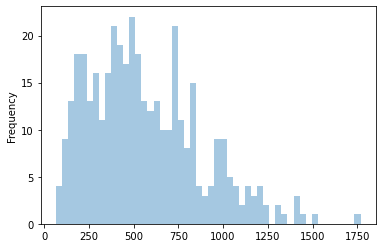

In [5]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')


In [6]:
df_hyy_1

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130
2018-08-28,2018,8,28,13.056500,1.517197,513.888488
2018-08-29,2018,8,29,15.028000,2.148551,720.768715


## load models:

## Read in model data. 

In [7]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Settings:

In [11]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [12]:
from_t = '2012-01-01'
to_t = '2015-01-01'

## Cases:

In [13]:
cases_sec = []#'OsloAeroSec_intBVOC_f19_f19']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19_mg17_full']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [14]:
case_mod = cases_orig[0]

In [15]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-04-19 10:27:35,635 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2022-04-19 10:27:35,635 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


In [16]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 


In [17]:
for case_name in cases_sec:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [18]:
dic_ds = dict()
for ca in cases_orig + cases_sec:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    dic_ds[ca]=ds

2022-04-19 10:27:35,943 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [19]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [21]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(location='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*ds_sel['T'])
    
        ds_sel['rho'] = rho.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0 
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]

    
        df_daily = df.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        dic_df[ca] = df_s
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

SO4_A1
0.17437625
SO4_A2
0.57631445
SO4_AC
0.006924627
SO4_NA
0.025642464
SO4_PR
0.06533303
OsloAero_intBVOC_f19_f19_mg17_full
OsloAero_intBVOC_f19_f19_mg17_full


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [23]:

#df_1 = dic_df[cases_sec[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_2 = dic_df[cases_orig[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_1 = df_2
df_1.head()

df_mod_dic = dict(OsloAeroSec=df_1, OsloAero = df_2)

(0.0, 2000.0)

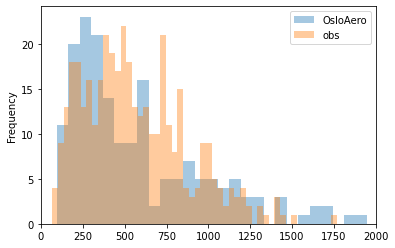

In [24]:

#df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
#plt.legend()
#plt.xlim([0,2000])
df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()
plt.xlim([0,2000])
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')
plt.legend()
plt.xlim([0,2000])

(0.0, 2000.0)

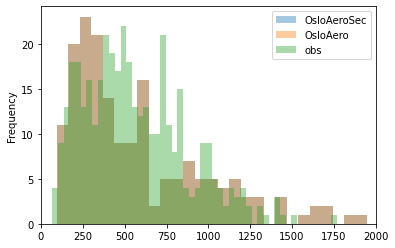

In [25]:

df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
#plt.legend()
#plt.xlim([0,2000])
df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()
plt.xlim([0,2000])
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')
plt.legend()
plt.xlim([0,2000])

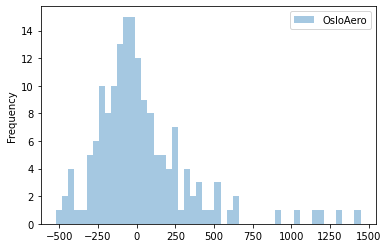

In [28]:
#df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
#df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')

#(-df_hyy_1['N100 (cm^-3)']+df_1['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
(-df_hyy_1['N100 (cm^-3)']+df_2['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()

In [29]:
dic_vars =dict(
    N100='N100 (cm^-3)',
    OA = 'OA (microgram m^-3)',
    T_C = 'T (degree C)',
)

In [30]:
df_1

,ACTREL,lev,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,DOD440,...,SS_A1,SS_A2,SS_A3,T,rho,SOA,OA,SO4,year,T_C
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01,0.058056,992.556095,6.372076e-11,1.509822e-12,7.925721e-12,8.556307e-13,4.780953e-12,9.336510e-16,0.000007,0.097085,...,1.169025e-10,7.193290e-10,2.136763e-09,292.895691,1.189372,0.918956,1.346438,1.051007,2012,19.745697
2012-07-02,0.000000,992.556095,3.937535e-11,1.405520e-12,5.104366e-12,8.653775e-13,4.576645e-12,1.110898e-15,0.000005,0.054236,...,1.232655e-10,7.803028e-10,2.233442e-09,291.323334,1.195790,0.613510,0.954829,0.536609,2012,18.173340
2012-07-03,0.000000,992.556095,2.880795e-11,6.125397e-13,3.390111e-12,5.108657e-13,2.512098e-12,2.008015e-17,0.000005,0.040097,...,7.196527e-11,5.013896e-10,1.640071e-09,292.326355,1.191689,0.764808,1.126395,0.385067,2012,19.176361
2012-07-04,0.000000,992.556095,2.175049e-11,1.096714e-13,2.741875e-12,2.981834e-13,1.292718e-12,3.413075e-18,0.000007,0.035297,...,1.242519e-11,7.993220e-11,2.381028e-10,293.918945,1.185232,1.343289,1.482140,0.119478,2012,20.768951
2012-07-05,0.547508,992.556095,3.648234e-11,1.749350e-13,4.401795e-12,3.922025e-13,1.836363e-12,9.174700e-17,0.000009,0.086474,...,1.297414e-11,8.552817e-11,2.555070e-10,295.920837,1.177213,1.682145,1.915949,0.295156,2012,22.770844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-27,0.000000,992.556095,1.241105e-11,7.813454e-13,2.843706e-12,3.086850e-13,1.423942e-12,2.600239e-15,0.000003,0.050726,...,1.811183e-12,9.876586e-12,1.398711e-11,286.726379,1.214962,0.459344,0.573245,0.250167,2014,13.576385
2014-08-28,0.000000,992.556095,1.647419e-11,2.147070e-12,2.403649e-12,3.707058e-13,1.843497e-12,2.543335e-15,0.000003,0.049881,...,5.545961e-12,3.430269e-11,8.376458e-11,285.742889,1.219144,0.511984,0.606333,0.252011,2014,12.592896
2014-08-29,0.000000,992.556095,1.730012e-11,2.018891e-12,3.155777e-12,4.738315e-13,2.346548e-12,1.070866e-14,0.000003,0.056848,...,7.521997e-12,4.101559e-11,6.495791e-11,284.783325,1.223252,0.438903,0.579553,0.448986,2014,11.633331


In [31]:

def get_common_df(v):
    ls =list()
    for m in df_mod_dic.keys():
        _df = df_mod_dic[m]
        ls.append(_df[v].rename(m))
    if v in dic_vars.keys():
        ls.append(df_hyy_1[dic_vars[v]].rename('Obs'))
    df_o = pd.concat(ls,axis=1)
    df_o['year'] = df_o.index.year
    return df_o

In [32]:
df_100 = get_common_df('N100')

df_100 = df_100.loc['2012-01-01':'2015-01-01']

df_OA = get_common_df('OA')
df_SO4 = get_common_df('SO4')

df_OA['OA_diff_Sec'] = df_OA['OsloAeroSec']-df_OA['Obs']

df_comb = pd.merge(df_OA, df_100, right_index=True, left_index=True)#['OA_diff_Sec'].plot()

df_comb = pd.merge(df_comb, df_SO4,  right_index=True, left_index=True)

df_comb['OA_diff_Sec_c'] = pd.qcut(df_comb['OA_diff_Sec'], [0,0.33,.5,0.66,1])

df_comb['SO4_c'] = pd.qcut(df_comb['OsloAeroSec'], [0,0.33,.5,0.66,1])
df_comb['OA_c'] = pd.qcut(df_comb['OsloAeroSec_x'], [0,0.33,.5,0.66,1])

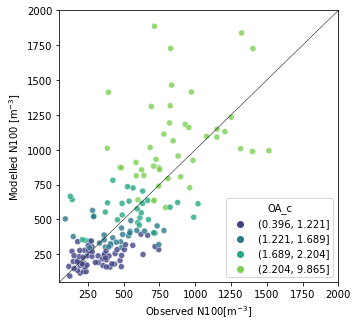

In [33]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='Obs_y', y='OsloAeroSec_y',#orbins=bins_, alpha=0.5, 
                                     hue='OA_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.8,
                palette='viridis',
                
                edgecolors=None,
                data = df_comb)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim([50,2000])
ax.set_ylim([50,2000])

ax.set_xlabel('Observed N100[m$^{-3}$]')
ax.set_ylabel('Modelled N100 [m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
#f#n = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

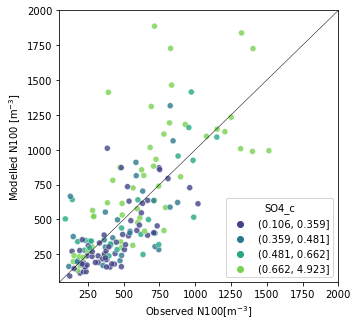

In [34]:
fi, ax = plt.subplots(figsize=[5,5],)
sns.scatterplot(x='Obs_y', y='OsloAeroSec_y',#orbins=bins_, alpha=0.5, 
                                     hue='SO4_c', 
                #col = 'dir',
                ax=ax,
                alpha=0.8,
                palette='viridis',
                
                edgecolors=None,
                data = df_comb)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlim([50,2000])
ax.set_ylim([50,2000])

ax.set_xlabel('Observed N100[m$^{-3}$]')
ax.set_ylabel('Modelled N100 [m$^{-3}$]')



lims = ax.get_xlim()
ax.plot(lims,lims,'k', linewidth=.5)
#f#n = make_fn_eval('OsloAero','scatt')
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [35]:
def add_reg(v_x, v_y, df_s, ax):
    _df = df_s[~df_s.isnull().any(axis=1)]
    x = np.array(_df[v_x].values).reshape(-1,1)
    y=np.array(_df[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    lab = r'fit: $y= %.3fx+ %.3f$, r2=%.2f' %(a,b,r_sq)
    li = ax.plot(x_s, (a*x_s + b), c='k')
    return lab, li

In [36]:
df_100[~df_100.isnull().any(axis=1)]

,OsloAeroSec,OsloAero,Obs,year
2012-07-01,420.522996,420.522996,781.245471,2012
2012-07-02,248.843616,248.843616,635.103339,2012
2012-07-03,283.846304,283.846304,745.212064,2012
2012-07-04,453.796607,453.796607,734.009356,2012
2012-07-05,612.855920,612.855920,1019.238450,2012
...,...,...,...,...
2014-08-27,172.755507,172.755507,243.775852,2014
2014-08-28,180.936940,180.936940,208.708834,2014
2014-08-29,195.883162,195.883162,174.618919,2014
2014-08-30,240.278668,240.278668,152.888233,2014


coefficient of determination: 0.5205592331982393
intercept: [266.16700919]
slope: [[0.48557875]]


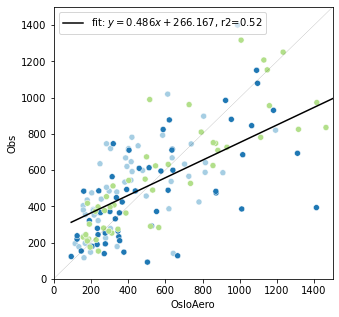

In [37]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAero'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

coefficient of determination: 0.5205592331982393
intercept: [266.16700919]
slope: [[0.48557875]]


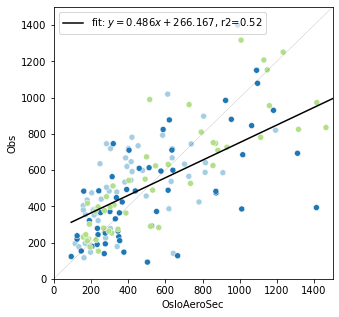

In [38]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAeroSec'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

coefficient of determination: 0.5205592331982393
intercept: [266.16700919]
slope: [[0.48557875]]


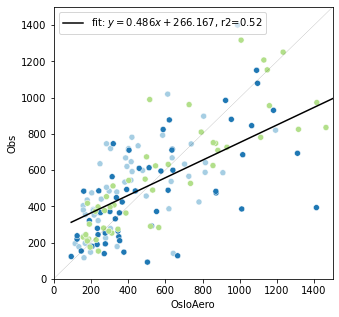

In [39]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAero'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

In [40]:
df_OA = get_common_df('OA')

df_OA = df_OA.loc['2012-01-01':'2015-01-01']

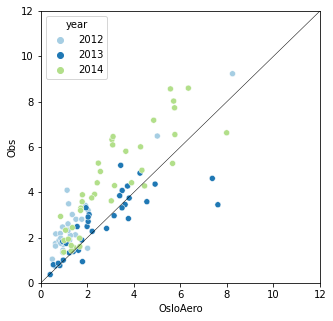

In [41]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


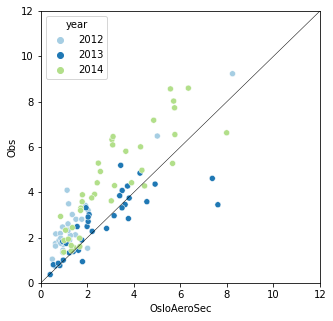

In [42]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


In [43]:
df_TC = get_common_df('T_C')

df_TC = df_TC.loc['2012-01-01':'2015-01-01']

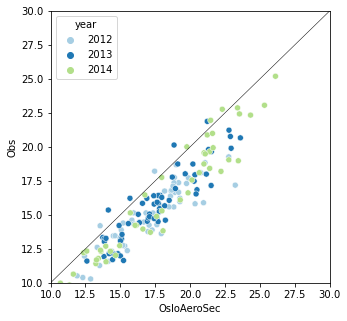

In [44]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


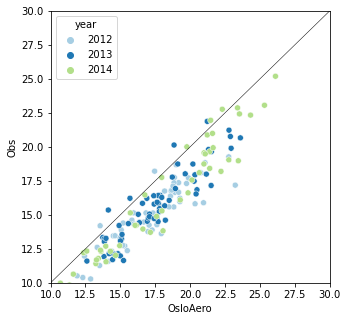

In [45]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


In [46]:

print('hey')


hey
